In [1]:
import os
os.chdir("C:\\Users\gusta\JupyterLab\Laboratorio de Modelacion 2\Data")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

import csv

transactions = pd.read_csv("data_assorules.csv")
category = pd.read_csv("cat_nombres.csv")
department = pd.read_csv("data_assorules_hat.csv")

Empezaremos viendo la forma en que se nos presentan los datos, este corresponde a un DataFrame de la siguiente forma

In [2]:
transactions.head(15)

,Visit_date,Visit_nbr,Category
0,2017-01-02,700200000,3
1,2017-01-02,700200001,126
2,2017-01-02,700200001,130
3,2017-01-02,700200002,127
4,2017-01-02,700200002,38
5,2017-01-02,700200002,130
6,2017-01-02,700200002,15
7,2017-01-02,700200002,125
8,2017-01-02,700200003,37
9,2017-01-02,700200004,119


## 1) Soporte de cada categoria
##### Iniciamos agrupando en el DataFrame por categorias y contamos las apariciones de cada una, para obtener el soporte como la frecuencia de aparición de cada categoria 

In [3]:
cat_supp=transactions.groupby("Category").apply(lambda x: x.Visit_nbr.count())

In [4]:
cat_supp.sum() #corresponde a la cantidad total de visitas durante el periodo a estudiar

2263447

In [5]:
cat_supp #corresponde a la cantidad de apariciones de cada categoria en el periodo a estudiar

Category
0       8875
1       2172
2      13757
3       3566
4       1432
       ...  
506      233
507      214
508      910
509        8
510     2014
Length: 272, dtype: int64

## 2) Soporte Conjunto

In [6]:
def genera_pares(x):
    res = list(combinations(x.Category.sort_values(), 2))
    if res != []:
        item1, item2 = zip(*res)
        return pd.DataFrame({'item1':item1, 'item2':item2, 'count':np.ones(len(res))})

Construiremos un nuevo DataFrame a partir de una matriz cuadadrada de tamaño dado por el numero total de categorias $272$ en que la diagonal será el soporte de las categorias individualmente y donde el elemento $S[i,j]$ corresponderá al soporte del par de categorias {i,j}, es decir, el numero de tickets en que se encuentran ambas categorias.

Usaremos el comando $pivot\_table$ de $pandas$ para crear un DataFrame con forma de matriz superior con la informacion que buscamos

In [7]:
categorias = sorted(transactions['Category'].unique())

In [8]:
transactions.groupby('Visit_nbr').apply(genera_pares).reset_index().drop(['Visit_nbr','level_1'],axis=1).groupby(['item1','item2']).agg(sum).to_csv('ItemsPorPares.csv')

In [9]:
por_pares = pd.read_csv("ItemsPorPares.csv")
supp_table = pd.pivot_table(por_pares, index='item1', columns= 'item2')['count'].fillna(0)
supp_table

item2,1,2,3,4,5,6,7,8,9,10,...,496,497,500,504,505,506,507,508,509,510
item1,,,,,,,,,,,,,,,,,,,,,
0,341.0,5600.0,625.0,280.0,432.0,161.0,116.0,1612.0,92.0,1492.0,...,18.0,8.0,69.0,37.0,9.0,23.0,17.0,53.0,2.0,189.0
1,0.0,464.0,91.0,49.0,83.0,24.0,29.0,287.0,23.0,275.0,...,2.0,7.0,17.0,14.0,6.0,3.0,3.0,13.0,0.0,28.0
2,0.0,0.0,958.0,401.0,721.0,202.0,154.0,2481.0,140.0,1986.0,...,28.0,21.0,100.0,69.0,14.0,30.0,22.0,65.0,3.0,304.0
3,0.0,0.0,0.0,246.0,295.0,87.0,49.0,748.0,40.0,557.0,...,16.0,6.0,19.0,21.0,3.0,11.0,6.0,21.0,0.0,120.0
4,0.0,0.0,0.0,0.0,153.0,44.0,25.0,355.0,30.0,248.0,...,6.0,3.0,12.0,10.0,0.0,1.0,2.0,7.0,0.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,1.0,5.0,1.0,14.0
505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,13.0,1.0,0.0,2.0
506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0,0.0,5.0


Concluimos esta primera parte creando el DataFrame propuesto, es decir, $final\_sop$. Que consiste en su diagonal del soporte de cada categoria y en los terminos sobre la diagonal el soporte de cada par de items que se haya comprado al menos una vez en el mismo ticket.

In [10]:
S= np.zeros((272,272))
final_sop = pd.DataFrame(S, columns= categorias).set_axis(categorias).fillna(0)
for cat in categorias:
    for cat2 in categorias:
        if (cat in supp_table.columns) and (cat2 in supp_table.index):
            if cat == cat2:
                final_sop[cat][cat]= cat_supp[cat]
            elif (cat >= cat2):
                final_sop[cat][cat2]= supp_table[cat][cat2]
        else:
            final_sop[cat][cat2]=0
final_sop[0][0]=cat_supp[0]              #Como 0 no esta en la indexacion de las columnas, lo agregamos manualmente
final_sop.to_csv('soporte_conjunto.csv')          #Guardamos la tabla de soportes en archivo csv para analisis posteriores

In [11]:
final_sop

,0,1,2,3,4,5,6,7,8,9,...,496,497,500,504,505,506,507,508,509,510
0,8875.0,341.0,5600.0,625.0,280.0,432.0,161.0,116.0,1612.0,92.0,...,18.0,8.0,69.0,37.0,9.0,23.0,17.0,53.0,2.0,189.0
1,0.0,2172.0,464.0,91.0,49.0,83.0,24.0,29.0,287.0,23.0,...,2.0,7.0,17.0,14.0,6.0,3.0,3.0,13.0,0.0,28.0
2,0.0,0.0,13757.0,958.0,401.0,721.0,202.0,154.0,2481.0,140.0,...,28.0,21.0,100.0,69.0,14.0,30.0,22.0,65.0,3.0,304.0
3,0.0,0.0,0.0,3566.0,246.0,295.0,87.0,49.0,748.0,40.0,...,16.0,6.0,19.0,21.0,3.0,11.0,6.0,21.0,0.0,120.0
4,0.0,0.0,0.0,0.0,1432.0,153.0,44.0,25.0,355.0,30.0,...,6.0,3.0,12.0,10.0,0.0,1.0,2.0,7.0,0.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,233.0,27.0,1.0,0.0,5.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,214.0,1.0,0.0,3.0
508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,910.0,0.0,10.0
509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

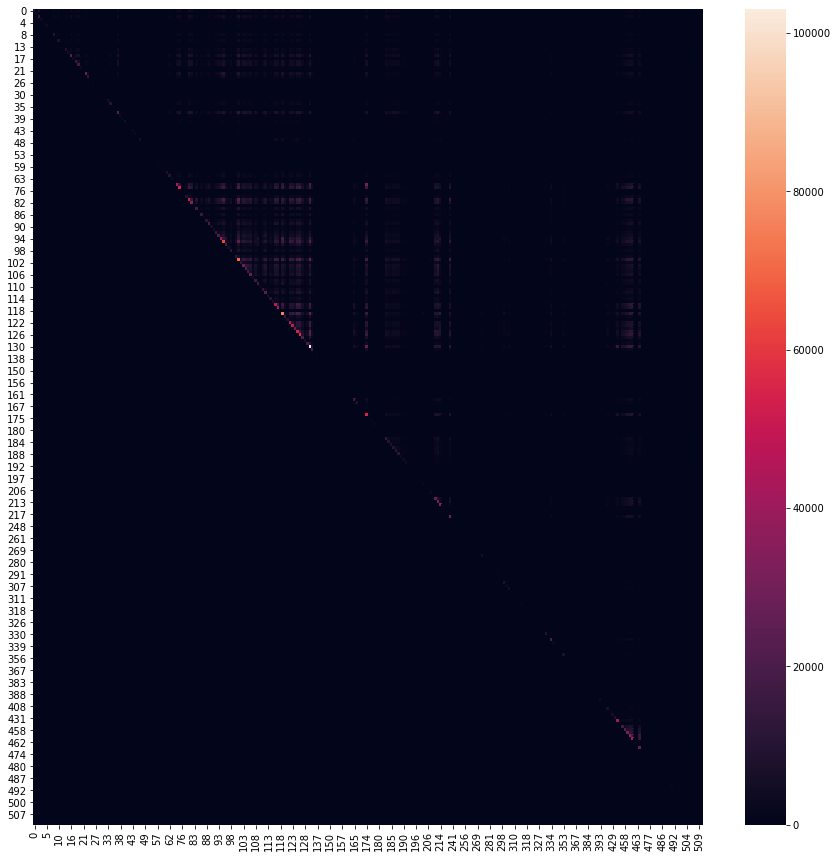

In [12]:
fig,ax= plt.subplots(figsize=(15,15))
sns.heatmap(final_sop, ax=ax)

#### Hemos conseguido el soporte de conjunto para todos los pares de items que se pueden conformar y aparecen al menos una vez juntos en los tickets, y los hemos almacenado en un nuevo archivo .csv para analisis posteriores